In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Medicaldataset.csv')

In [3]:
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [5]:
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [7]:
df.isnull().sum()   

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [12]:
# Set heart rate outliers (>300) to NaN
df.loc[df['Heart rate'] > 300, 'Heart rate'] = np.nan

# Fill missing values in 'Heart rate' with the median
df['Heart rate'].fillna(df['Heart rate'].median(), inplace=True)

# Map 'Result' column to binary values
df['Result'] = df['Result'].map({'positive': 1, 'negative': 0})

print("\nAfter cleaning:")
print("Max heart rate:", df['Heart rate'].max())
print("Result value counts:")
print(df['Result'].value_counts())


After cleaning:
Max heart rate: 135.0
Result value counts:
Result
1    810
0    509
Name: count, dtype: int64


C:\Users\Ammar Arain\AppData\Local\Temp\ipykernel_3884\1552978259.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Heart rate'].fillna(df['Heart rate'].median(), inplace=True)


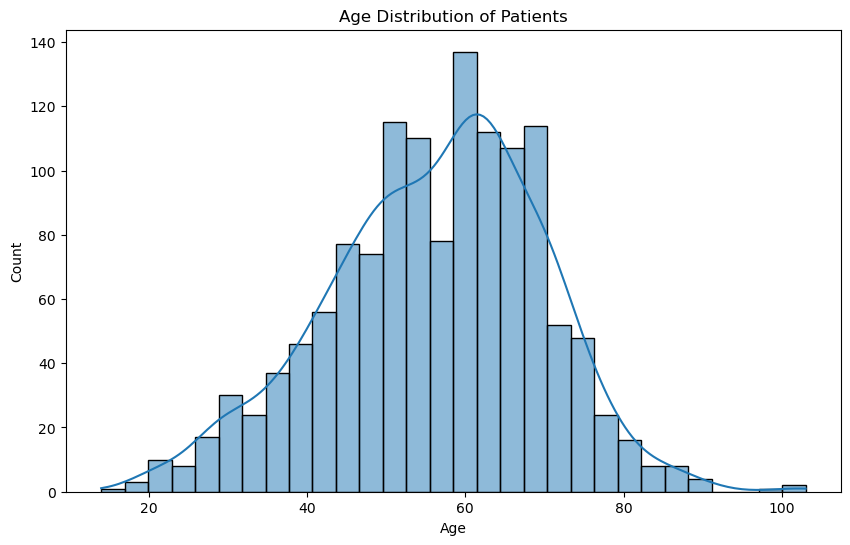

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Age"], kde=True, bins=30)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

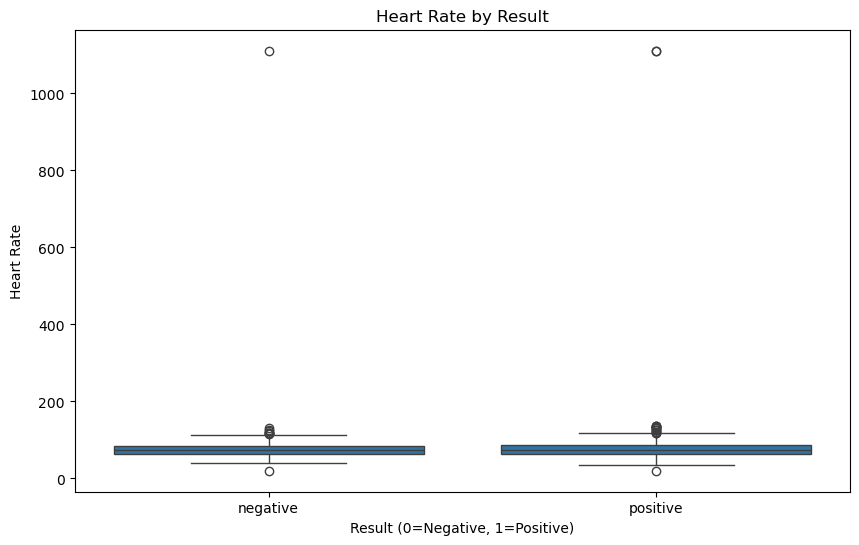

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Result", y="Heart rate", data=df)
plt.title("Heart Rate by Result")
plt.xlabel("Result (0=Negative, 1=Positive)")
plt.ylabel("Heart Rate")
plt.show()

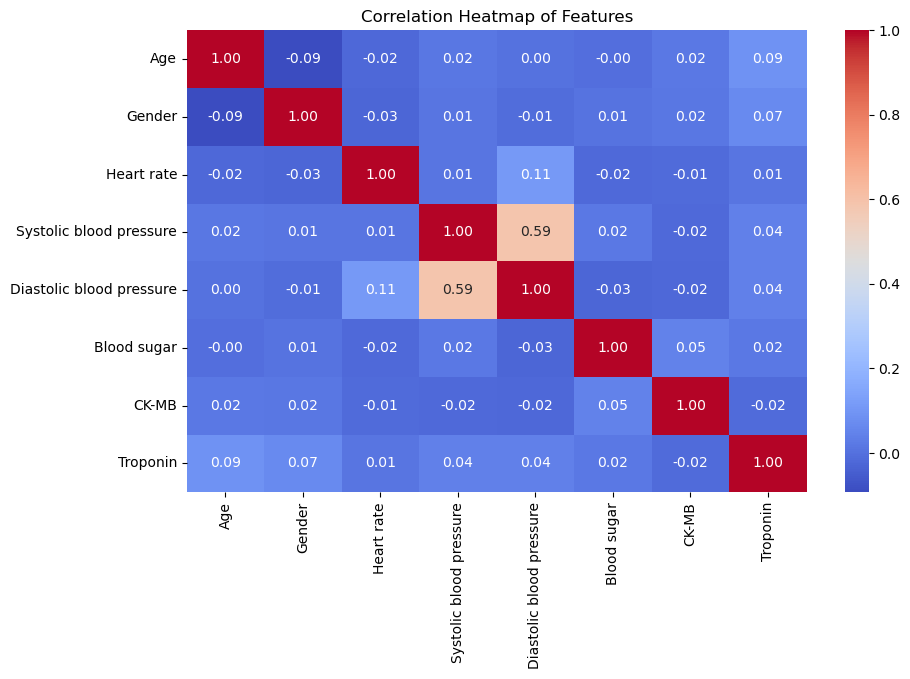

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

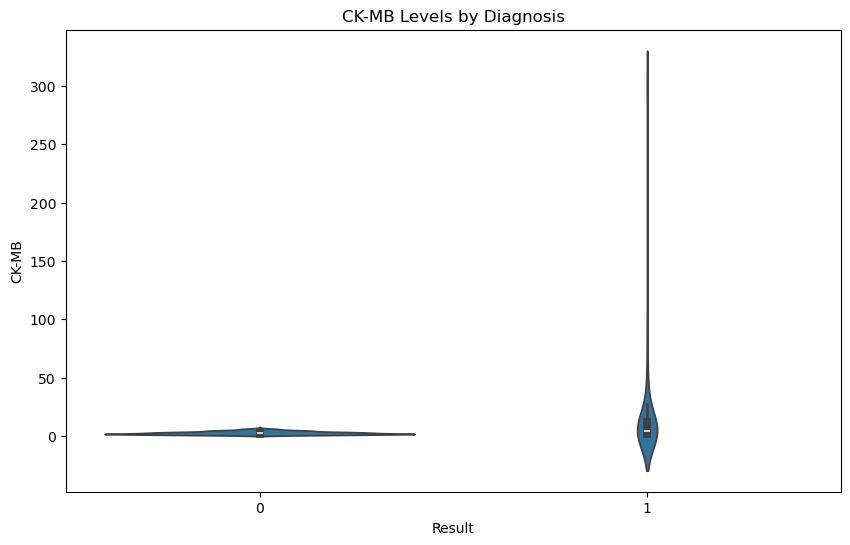

In [15]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="Result", y="CK-MB", data=df)
plt.title("CK-MB Levels by Diagnosis")
plt.show()
    

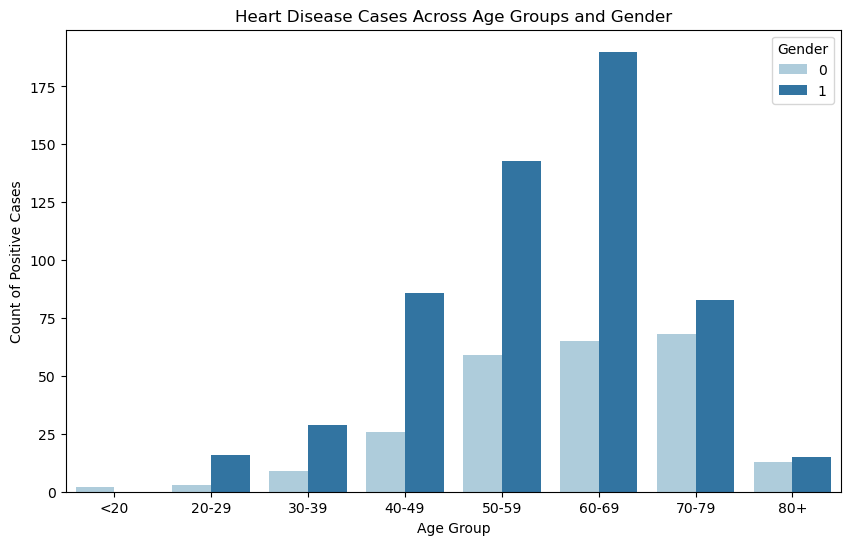

In [17]:
# Create Age_group column using bins
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]
age_labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
df['Age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

df_filtered = df[df["Result"] == 1]

df_grouped = df_filtered.groupby(["Age_group", "Gender"], observed=True)["Result"].count().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_grouped, x="Age_group", y="Result", hue="Gender", palette="Paired")

plt.title("Heart Disease Cases Across Age Groups and Gender")
plt.xlabel("Age Group")
plt.ylabel("Count of Positive Cases")
plt.legend(title="Gender")
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV


In [19]:
df['Pulse_pressure'] = df['Systolic blood pressure'] - df['Diastolic blood pressure']
df['MAP'] = df['Diastolic blood pressure'] + (df['Pulse_pressure'] / 3)



In [20]:
X = df.drop('Result', axis=1)
y = df['Result']


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [23]:
# Encode 'Age_group' categorical feature before scaling
X_train_enc = X_train.copy()
X_test_enc = X_test.copy()

X_train_enc['Age_group'] = X_train_enc['Age_group'].cat.codes
X_test_enc['Age_group'] = X_test_enc['Age_group'].cat.codes

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_enc)
X_test_scaled = scaler.transform(X_test_enc)


In [24]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [25]:
y_pred = rf.predict(X_test_scaled)

print("Random Forest Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Random Forest Classifier Results:
Accuracy: 0.9797979797979798

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       153
           1       0.99      0.98      0.98       243

    accuracy                           0.98       396
   macro avg       0.98      0.98      0.98       396
weighted avg       0.98      0.98      0.98       396



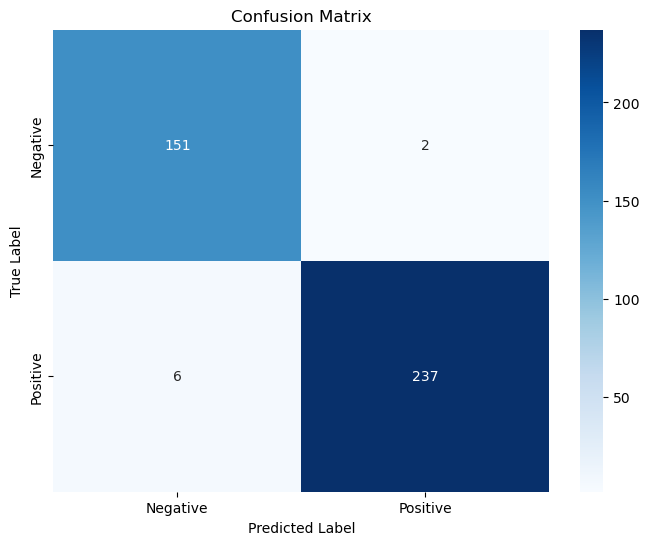

In [26]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


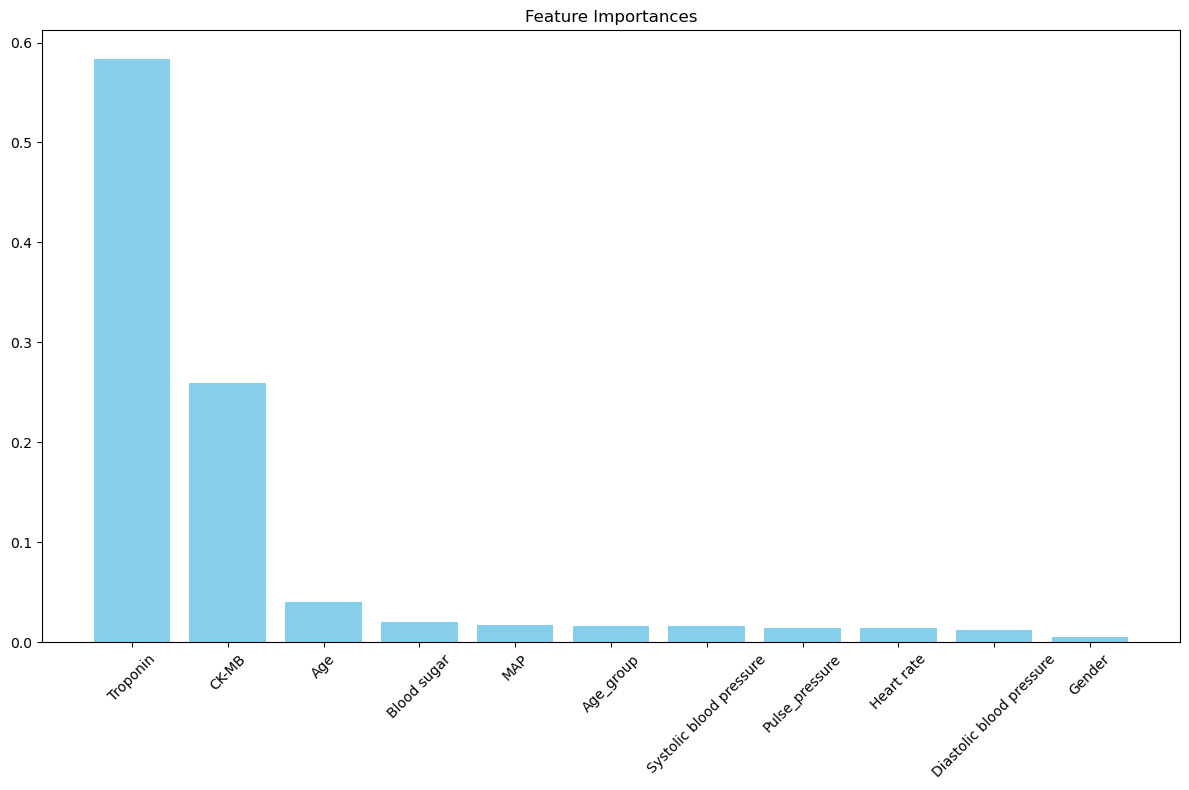

In [28]:
importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center', color='skyblue')
plt.xticks(range(X.shape[1]), features[indices], rotation=45)
plt.tight_layout()
plt.show()

In [30]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                          param_grid=param_grid, 
                          cv=5, 
                          n_jobs=-1, 
                          verbose=1)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.9892


In [31]:
best_rf = grid_search.best_estimator_
y_pred_tuned = best_rf.predict(X_test_scaled)
print("\nTuned Model Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("\nTuned Classification Report:")
print(classification_report(y_test, y_pred_tuned))


Tuned Model Accuracy: 0.9797979797979798

Tuned Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       153
           1       0.99      0.98      0.98       243

    accuracy                           0.98       396
   macro avg       0.98      0.98      0.98       396
weighted avg       0.98      0.98      0.98       396

